In [2]:
# Import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import opendatasets as od

In [3]:
# Step 1: Download the dataset from Kaggle
dataset_url = "https://www.kaggle.com/datasets/anshulmehtakaggl/chess-pieces-detection-images-dataset"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle username:Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/anshulmehtakaggl/chess-pieces-detection-images-dataset


In [ ]:
# Step 2: Define the path to the dataset
dataset_path = "./chess-pieces-detection-images-dataset"

In [5]:
# Step 3: Load the dataset and prepare the data
def load_images_and_labels(dataset_path, image_size=(64, 64)):
    images = []
    labels = []
    for piece_name in os.listdir(dataset_path):
        piece_folder = os.path.join(dataset_path, piece_name)
        if os.path.isdir(piece_folder):
            for image_name in os.listdir(piece_folder):
                image_path = os.path.join(piece_folder, image_name)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    image = cv2.resize(image, image_size)
                    images.append(image.flatten())
                    labels.append(piece_name)
    return np.array(images), np.array(labels)

In [6]:
# Load the images and labels
X, y = load_images_and_labels(dataset_path)

In [7]:
# Step 4: Normalize the image data
X = X / 255.0

In [8]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 6: Train a K-Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# Step 7: Evaluate the classifier
y_pred = knn.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
                 precision    recall  f1-score   support

 Queen-Resized       0.21      0.48      0.29        21
   Rook-resize       0.30      0.48      0.37        25
bishop_resized       0.56      0.29      0.38        35
 knight-resize       0.67      0.21      0.32        38
  pawn_resized       0.14      0.17      0.15        12

      accuracy                           0.32       131
     macro avg       0.38      0.32      0.30       131
  weighted avg       0.45      0.32      0.33       131

Confusion Matrix:
 [[10  6  2  1  2]
 [ 9 12  0  2  2]
 [12  7 10  1  5]
 [10 12  5  8  3]
 [ 6  3  1  0  2]]


In [11]:
# Step 8: Visualize some predictions
def plot_predictions(images, labels_true, labels_pred, image_size=(64, 64), num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        image = images[i].reshape(image_size)
        plt.imshow(image, cmap='gray')
        plt.title(f"True: {labels_true[i]}\nPred: {labels_pred[i]}")
        plt.axis('off')
    plt.show()

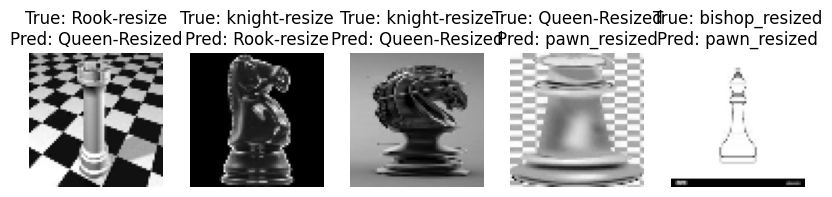

In [12]:
plot_predictions(X_test, y_test, y_pred, num_images=5)